## Gather

The first step is to gather all our data which we will be wrangling, there are three sources:

1. The WeRateDogs Twitter archive, given as twitter_archive_enhanced.csv.

2. The tweet image predictions, downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.

3. Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 

## Assess



The second step is assessing all the data for at least 8 quality issues and 2 tidiness issues, here are the issues found:

#### Quality
##### `twitter_archive` table

1. Convert tweet_id to object. 
2. Clean up sources column by extracting source. 
3. expanded_urls column has missing data.
4. Convert timestamp and retweeted_status_timestamp columns to datetime object.

##### `twitter_api` table
5. Convert id to object. 
6. Rename id column to tweet_id. 
7. Convert created_at to datetime object. 

##### `image_predictions` table
8. Convert tweet_id to object. 
9. Convert all prediction dog breed names to lowercase in p1, p2, p3 columns.

#### Tidiness

9. in_reply_to_status_id & in_reply_to_user_id columns in twitter_archive dataframe are not needed.
10. Remove unwanted retweets (if the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns from twitter_archive dataframe are not null, that meansit's a retweet and not an original tweet).
11. doggo, floofer, pupper, puppo columns in twitter_archive dataframe can be combined into one column (dog_stage).
12. Remove img_num column from image_predictions table as it is not needed.
13. Merge all 3 tables into one master table.

## Clean

The last step is to clean the data, then create visualizations and insights with the cleaned data. Here are some visualizations I made after this step:

In [1]:
import pandas as pd
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

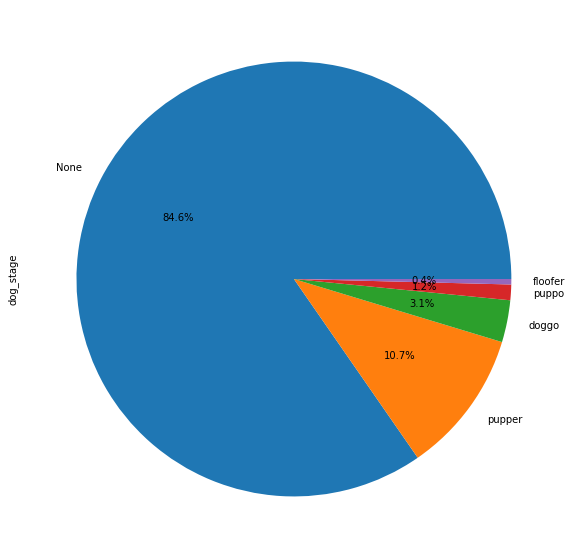

In [2]:
twitter_archive_master.dog_stage.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

- Most of dog stage values are not documented and therefore classified as None, whilst 10% of dogs are in the pupper stage.
- Least dog stage is fluffer with under 1%.

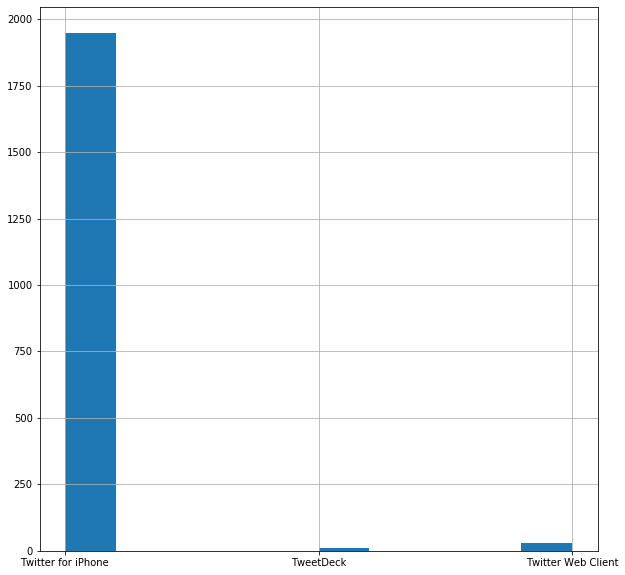

In [3]:
twitter_archive_master.source.hist(figsize=(10,10))

- Most popular source of tweeting was by using Twitter for iPhone, Twitter Web Client and Tweetdeck were rarely used for tweeting in the WeRateDogs account. 

Text(0, 0.5, 'Favorite Count')

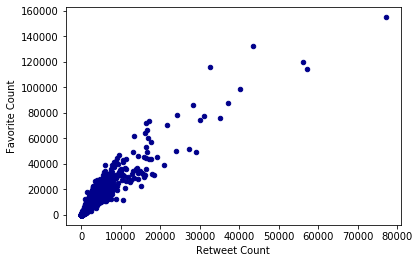

In [4]:
ax = twitter_archive_master.plot.scatter(x='retweet_count', y='favorite_count', c='DarkBlue')
ax.set_xlabel("Retweet Count")
ax.set_ylabel("Favorite Count")

- There's a positive correlation between retweet and favourites count, but then again there usually is when it comes to twitter.